#  EMAIL SPAM DETECTION WITH MACHINE LEARNING
We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content. In this Project, I have used Python to build an email spam detector. Then, used machine learning to train the spam detector to recognize and classify emails into spam and non-spam.

## Objective  
The objective of this project is to train a machine learning model that can identify spam massages and classify them.

## Elaborating the process 
The process consists of the followin processess: Data importing, missing values handling, data preprocessing,text preprocessing, data transformation, EDA, model building.
There are many ML algorithms for the classifcation of spam massages. So, I will try to train several ML models and find the best model for the task. I have chosen some renowened ML models. Such as, ExtraTreesClassifier, MultinomialNaiveBayes, MLPClassifier. After training these models I will chose the best bodel based on the performance.

## The process:

### Importing libraries required for the project  
I need several python libraries for my classification task. So, I need to import them. I have imported all the required libraries in one Notebook cell.

In [ ]:
# !pip install wordcloud
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import STOPWORDS

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# ! unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from tabulate import tabulate

# load libraries for model building
from sklearn.ensemble import  ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from scipy.stats import randint as sp_randint
from scipy.stats import uniform

### Data Importing

In [2]:
data = pd.read_csv('C:/Users/dsaky/OneDrive/Desktop/Oasis Infobyte/Project 4/spam.csv', encoding='latin1')
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Here, we have unnecessary columns named, Unnamed: 2, Unnamed: 3, Unnamed: 4.

In [3]:
data.shape

(5572, 5)

### Missing values handling 

In [4]:
# Checking missing values in dataset
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### Data Preprocessing

There is some texts in the Unnamed: 2, Unnamed: 3, Unnamed: 4 columns. So, I will marge these columns to v2 column and create sms column.

In [5]:
data["Unnamed: 2"] = data["Unnamed: 2"].fillna(" ")
data["Unnamed: 3"] = data["Unnamed: 3"].fillna(" ")
data["Unnamed: 4"] = data["Unnamed: 4"].fillna(" ")

data["sms"] = data["v2"] + data["Unnamed: 2"] + data["Unnamed: 3"] + data["Unnamed: 4"]

df = data.drop(columns=['v2', 'Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'])
df.columns = ["target", "sms"]
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.isnull().sum()

target    0
sms       0
dtype: int64

### Preprocessing Texts

Text preprocessing is essential for preparing text data in natural language processing (NLP). It lowers text case, removes punctuation and special characters to reduce noise, tokenizes text into words, lemmatizes to standardize words, removes stop words for focus, and prepares text for analysis or modeling. This ensures data is clean, standardized, and ready for effective NLP tasks.

In [7]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenize the text into individual words
    tokens = word_tokenize(text)
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in lemmatized_tokens if token not in stop_words]

    # Join the filtered tokens back into a single string
    preprocessed_text = ' '.join(filtered_tokens)

    return preprocessed_text

In [8]:
# Apply preprocessing column
df['preprocessed_sms'] = df['sms'].apply(preprocess_text)

print(df[ 'preprocessed_sms'].head())

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4             nah dont think go usf life around though
Name: preprocessed_sms, dtype: object


In [9]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the sentiment column
label_encoder.fit(df['target'])

# Encode the sentiment column
df['target'] = label_encoder.transform(df['target'])

print(df['target'].head(10))

0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    0
8    1
9    1
Name: target, dtype: int32


### Exploring the preprocessed data

In [10]:
from collections import Counter
counter = Counter(df['target'])
print('Before', counter)

Before Counter({0: 4825, 1: 747})


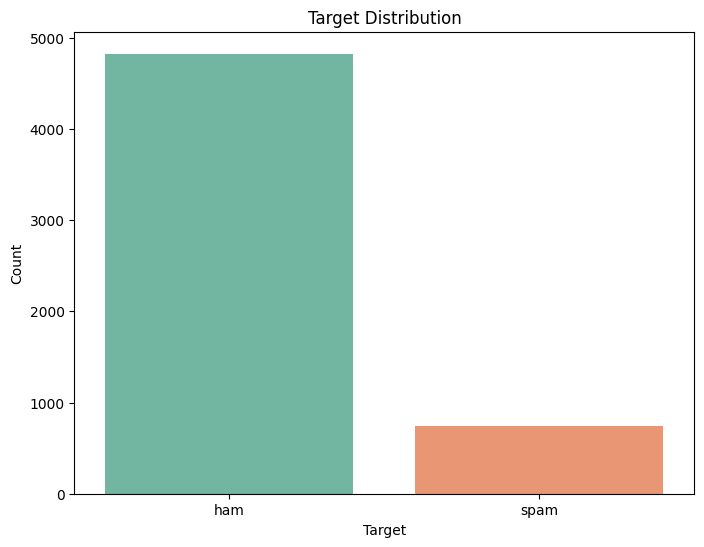

In [11]:
# Count the occurrences of each label in target
target_counts = df['target'].value_counts()

# Visualize the distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=["ham","spam"], y=target_counts.values, palette="Set2")
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

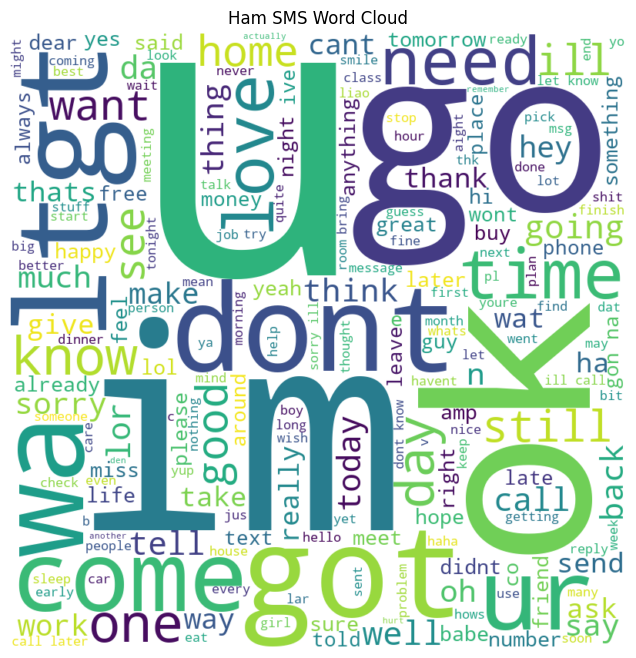

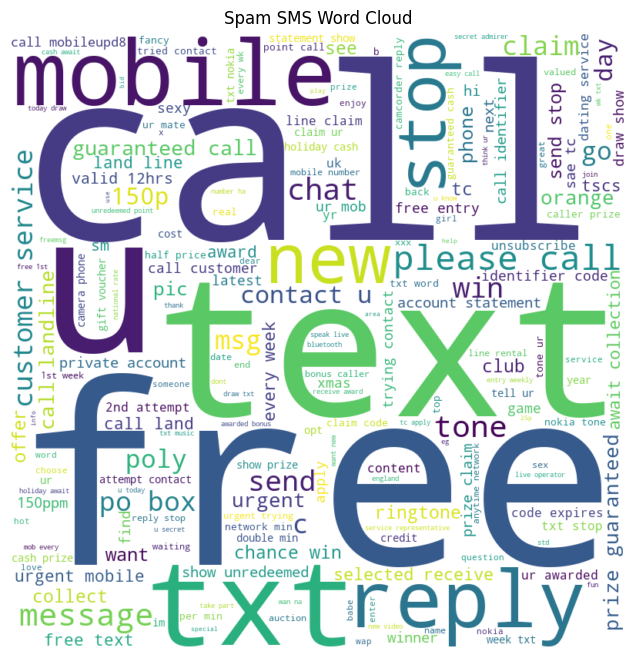

In [12]:

# Create separate DataFrames for each target category
ham_df = df[df['target'] == 0]
spam_df = df[df['target'] == 1]

# Combine text data for each target category into a single string
ham_text = ' '.join(ham_df['preprocessed_sms'])
spam_text = ' '.join(spam_df['preprocessed_sms'])

# Create WordCloud instances for each target category
ham_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(ham_text)
spam_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(spam_text)

# Plot the word clouds using Matplotlib
plt.figure(figsize=(10, 8))

plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham SMS Word Cloud')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 8))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam SMS Word Cloud')
plt.axis('off')
plt.show()


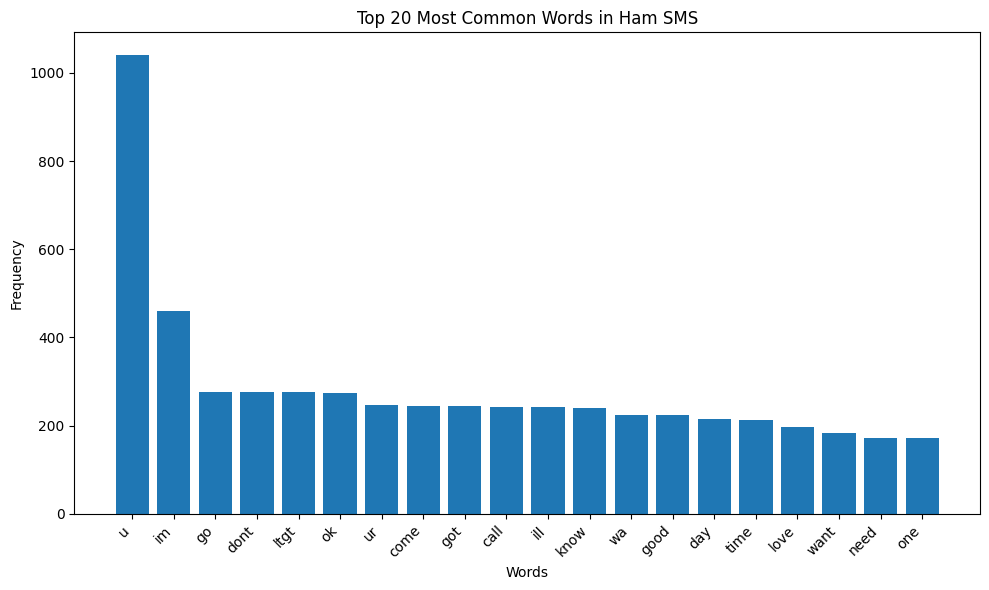

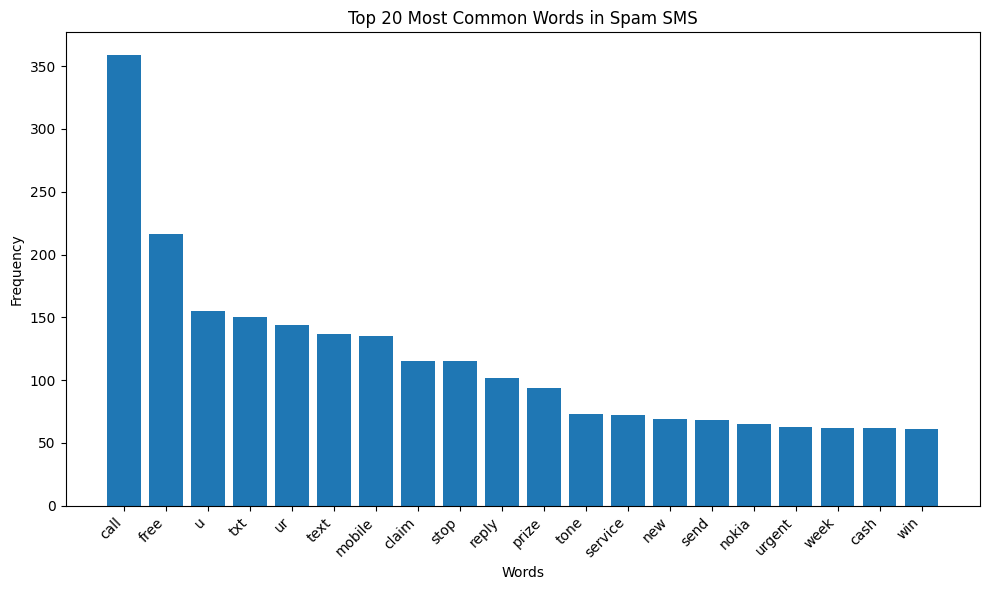

In [13]:
# Function to create a word frequency plot
def create_word_frequency_plot(text, title):
    tokens = word_tokenize(text)
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english') and word.lower() not in STOPWORDS]
    word_counts = Counter(filtered_tokens)
    common_words = word_counts.most_common(20)
    words, frequencies = zip(*common_words)
    
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Create word frequency plots for each target category
create_word_frequency_plot(ham_text, 'Top 20 Most Common Words in Ham SMS')
create_word_frequency_plot(spam_text, 'Top 20 Most Common Words in Spam SMS')


### Data preparation for model building

In [14]:
tfidf = TfidfVectorizer()
# feature
X = tfidf.fit_transform(df['preprocessed_sms']).toarray()
X.shape


(5572, 8872)

In [15]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
y = df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=35)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (4179, 8872)
y_train shape (4179,)
X_test shape (1393, 8872)
y_test shape (1393,)


In [18]:
# scaling the Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
counter = Counter(y_train)
print('Before', counter)

smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0: 3625, 1: 554})
After Counter({1: 3625, 0: 3625})


### Model Building

In [22]:
# initialize model
classifiers = [
    ExtraTreesClassifier(),
    MultinomialNB(),
    MLPClassifier()
]

In [23]:
def perform_cross_validation(classifiers, X_train_sm, y_train_sm, X_test, y_test, cv_splits=5):
    results = []

    for clf in classifiers:
        # Create a cross-validation object with the specified number of splits
        print(clf)
        cv = StratifiedKFold(n_splits=cv_splits)

        # Perform cross-validation using cross_val_score
        scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')

        # Calculate the average accuracy across all folds
        average_accuracy = scores.mean()

        # Fit the classifier on the full training data
        clf.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = clf.predict(X_test)

        # Compute accuracy score on test data
        accuracy_test = accuracy_score(y_test, y_pred)

        # Compute confusion matrix on test data
        cm = confusion_matrix(y_test, y_pred)

        # Append results to the list
        results.append([type(clf).__name__, average_accuracy, accuracy_test])
        
     # Sort results based on test data accuracy in descending order
    results.sort(key=lambda x: x[2], reverse=True)

    # Create the table headers
    headers = ['Classifier', 'Cross-Validation Accuracy', 'Test Data Accuracy']

    # Print the results table
    print(tabulate(results, headers=headers, floatfmt=".4f"))

    return results


In [24]:
# Call the perform_cross_validation function
results = perform_cross_validation(classifiers, X_train_sm, y_train_sm, X_test, y_test, cv_splits=5)

ExtraTreesClassifier()
MultinomialNB()
MLPClassifier()
Classifier              Cross-Validation Accuracy    Test Data Accuracy
--------------------  ---------------------------  --------------------
ExtraTreesClassifier                       0.9758                0.9770
MLPClassifier                              0.9782                0.9763
MultinomialNB                              0.9763                0.9742


Based on the accuracey ExtraTreesClassifier provides the best performance. Hence, I select this model for classifying spam classification in this particular problem.